In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from numpy import arange
import csv
from scipy.interpolate import interp1d



csvfile = pd.read_csv ('/mnt/c/Users/myckf/OneDrive/Dokumenty/Documents/franek-personal/studia/fizyka/kawa/kody_od_czerepa/coffee.txt')
csvfile2 = pd.read_csv ('/mnt/c/Users/myckf/OneDrive/Dokumenty/Documents/franek-personal/studia/fizyka/kawa/kody_od_czerepa/cof_mass1.txt')

file = csvfile.to_numpy()
file2 = csvfile2.to_numpy()

[[ 5.36884644e-04 -7.89226162e-05]
 [-7.89226162e-05  1.31003018e-05]]
a =  0.6601377414879631  +-  0.023170771322165433
b =  -0.14045831572483722  +-  0.0036194339063470513


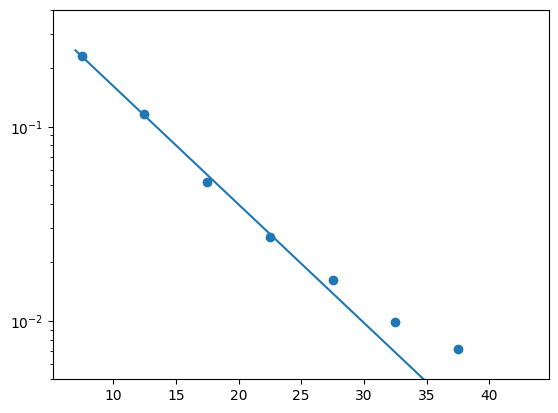

In [7]:
time_mass = file2[:,0]
time_mass = time_mass/1000 #bo pomiar czasu w ms
time_mass = time_mass - 2.5 #dane dla TDS są uśrednione co 5s
mass = file2[:,1]
mass[mass < 0] = 0

time = file[0] - 2.5
time = time
TDS = file[1]
TDS = TDS/100 #TDS to procent


def exp(t,a,b):
    f = a*np.exp(b*t)
    return f


popt, pcov = curve_fit(exp, time, TDS, p0 = (1, 0) )
print(pcov)

pcov = np.array(np.sqrt(np.diag(pcov)))


time2 = np.arange(min(time)-0.5,max(time)+0.5,0.05)

y_tab = exp(time2,popt[0],popt[1])


plt.plot(time2,y_tab)
plt.ylim(0.005, 0.4)
plt.scatter (time, TDS)
plt.gca().set_yscale('log')
plt.show
TDSexp = exp(time_mass, *popt) #wykres exp TDS od czasu dla całej osi



print('a = ' , popt[0], ' +- ',pcov[0] )
print('b = ' , popt[1], ' +- ',pcov[1] )


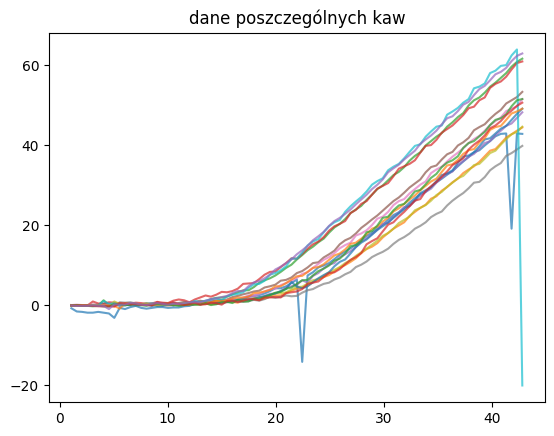

In [8]:
Time = []
Mass = []
plt.figure()
for i in range(1,16):
    name = 'cof_mass' + str(i)
    csvfile = pd.read_csv('/mnt/c//Users/myckf/OneDrive/Dokumenty/Documents/franek-personal/studia/fizyka/kawa/kody_od_czerepa/' + name +'.txt')
    file = csvfile.to_numpy()
    #print(file[-1][0])
    time3 = file[0:85,0]/1000
    mass2 = file[0:85,1]
    plt.plot(time3,mass2,alpha = 0.7)
    plt.title('dane poszczególnych kaw')
    Time.append(time3)
    Mass.append(mass2)
Mass = np.array(Mass)
Mass[Mass < 0] = 0


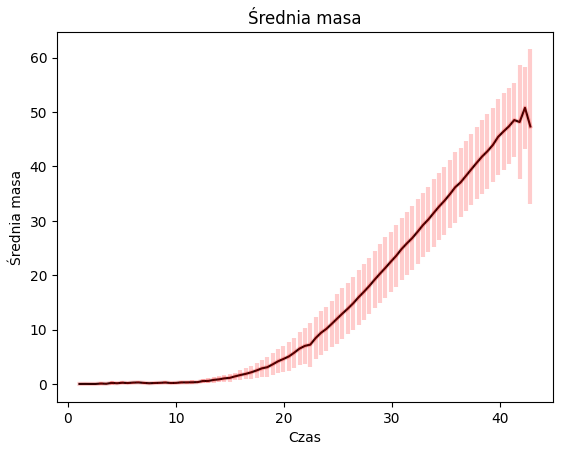

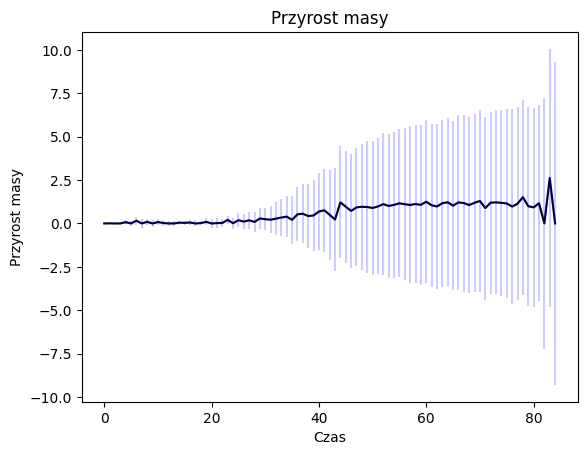

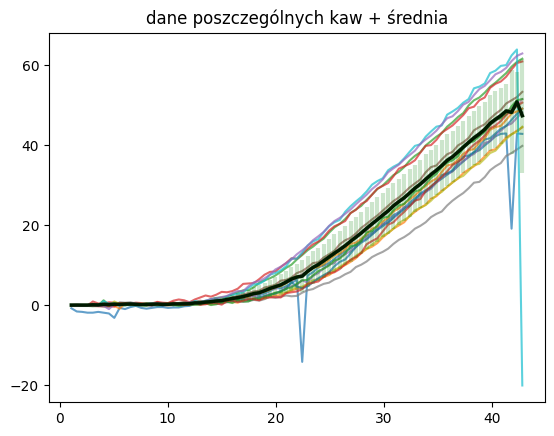

In [9]:
MeanMass = []
for j in range(Mass.shape[1]):
    MeanMass.append(np.mean(Mass[:, j]))  # calculates mean mass

std = []
for j in range(Mass.shape[1]):
    std.append(np.std(Mass[:, j]))  # calculates mean mass standard deviation
std = np.array(std)
#print(std)


plt.figure()
plt.plot(time3, MeanMass, c = 'k')
plt.errorbar(time3, MeanMass, yerr=std, linewidth=3, c='r', alpha = 0.2)
plt.title('Średnia masa')
plt.xlabel('Czas')
plt.ylabel('Średnia masa')
plt.show()

#przyrost = []
#for i in range(0, len(MeanMass) -1):
#    przyrost.append(MeanMass[i + 1] - MeanMass[i])
    
#przyrost.insert(0, 0)

przyrost = []
for i in range(0, len(MeanMass) - 1):
    difference = MeanMass[i + 1] - MeanMass[i]
    if difference < 0:
        difference = 0
    przyrost.append(difference)

przyrost.insert(0, 0)

#print (przyrost, mass2)


odch = std**2
#print(odch)

przyrost_std = []
for i in range(0, len(odch) -1):
    przyrost_std.append((odch[i + 1] + odch[i])/3)

pierwiastek_std = np.sqrt(np.array(przyrost_std))
#pierwiastek_std = pierwiastek_std/len(pierwiastek_std)    
pierwiastek_std = np.insert(pierwiastek_std, 0, 0)

#print(pierwiastek_std)
#print(przyrost)

plt.figure()
#plt.errorbar(range(0, len(przyrost)), przyrost, yerr = pierwiastek_std, color='g')
plt.plot(przyrost, color = 'k')
plt.errorbar(range(0, len(przyrost)), przyrost, yerr=pierwiastek_std, color='b', alpha=0.2)
plt.title('Przyrost masy')
plt.xlabel('Czas')
plt.ylabel('Przyrost masy')
plt.show()

MeanMass = np.array(MeanMass)
time3 = time3 - 2.5

Time = []
Mass = []
plt.figure()
for i in range(1,16):
    name = 'cof_mass' + str(i)
    csvfile = pd.read_csv('/mnt/c//Users/myckf/OneDrive/Dokumenty/Documents/franek-personal/studia/fizyka/kawa/kody_od_czerepa/' + name +'.txt')
    file = csvfile.to_numpy()
    #print(file[-1][0])
    time3 = file[0:85,0]/1000
    mass2 = file[0:85,1]
    plt.plot(time3,mass2,alpha = 0.7)
    plt.title('dane poszczególnych kaw + średnia')
    Time.append(time3)
    Mass.append(mass2)
plt.errorbar(time3, MeanMass, yerr=std, linewidth=3, c='g', alpha = 0.2)
plt.plot(time3, MeanMass, linewidth = 2.5, c = 'k')
Mass = np.array(Mass)
Mass[Mass < 0] = 0

<function matplotlib.pyplot.show(close=None, block=None)>

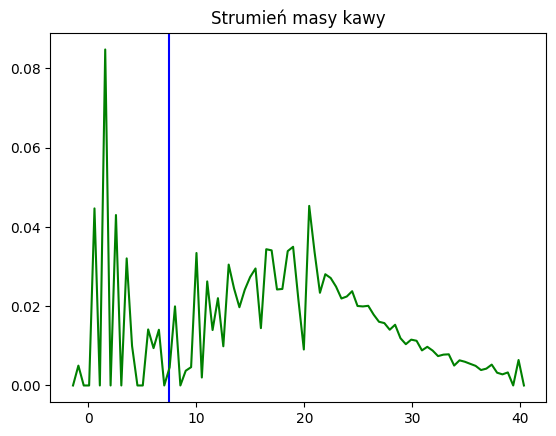

In [10]:
prod = TDSexp*przyrost #plotuje strumień masy rozpuszczonej kawy
plt.figure()
#plt.scatter(time,TDS, c ='k')
#plt.plot(time_mass, TDSexp)
#plt.plot(time3, Mass2)
plt.axvline (x = 7.5, color = 'b')
plt.plot(time_mass,prod, c = 'g')
plt.title('Strumień masy kawy')
plt.show
